In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
# Set seed for reproducibility
SEED = 42
rng = np.random.default_rng(SEED)

In [17]:
# Load in all the labels. We are using this dataset for a different task than originally defined so we won't use the predefined splits
df = pd.read_csv("identity_CelebA.txt", delim_whitespace=True, header=None, names=["image_path", "label"])

In [18]:
# Only keep labels that have at least 30 images (5 for test, 5 for val, the rest for train)
df = df[df["label"].map(df["label"].value_counts()) >= 30]

In [19]:
# Shuffle DataFrame
df = df.sample(frac=1, random_state=SEED).reset_index(drop=True)

In [20]:
# Function to assign splits
def assign_split(group, num_test=5, num_val=5):
    idx = group.index.to_numpy()
    test_idx = rng.choice(idx, size=num_test, replace=False)
    remaining_idx = np.setdiff1d(idx, test_idx)
    val_idx = rng.choice(remaining_idx, size=num_val, replace=False)
    split = pd.Series(['train'] * len(group), index=idx)
    split[test_idx] = 'test'
    split[val_idx] = 'val'
    return split

In [21]:
# Apply per-label split
df['stage'] = df.groupby('label', group_keys=False).apply(assign_split)

In [22]:
df = df.reset_index(drop=True)
df["sample_id"] = df.index + 1

In [23]:
df = df[["sample_id", "image_path", "label", "stage"]]

In [24]:
df.head()

,sample_id,image_path,label,stage
0,1,020006.jpg,5512,train
1,2,089793.jpg,9168,val
2,3,005982.jpg,5153,train
3,4,031843.jpg,3181,train
4,5,164562.jpg,2523,train


In [25]:
df["stage"].value_counts().to_dict()

{'train': 47238, 'val': 11800, 'test': 11800}

In [26]:
for spl in ["train", "val", "test"]:
    df_spl = df[df["stage"] == spl]
    print(len(df_spl), "images in", spl, "stage")
    print(df_spl["label"].nunique(), "unique labels in", spl, "stage")

47238 images in train stage
2360 unique labels in train stage
11800 images in val stage
2360 unique labels in val stage
11800 images in test stage
2360 unique labels in test stage


In [27]:
# Save the DataFrame to a CSV file
df.to_csv("dataset.csv", index=False)

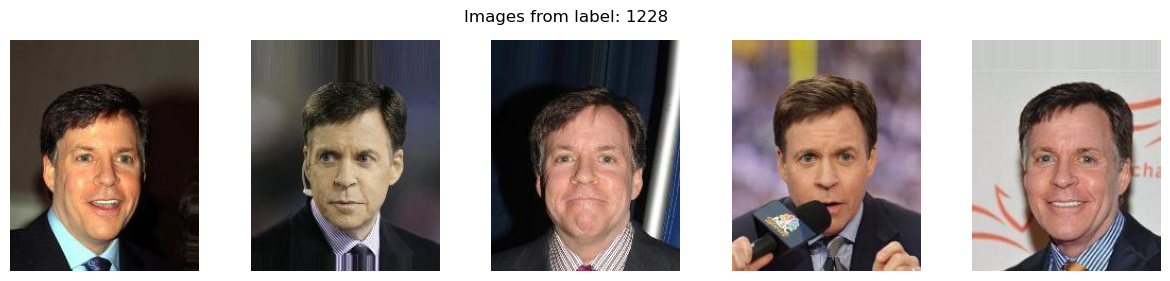

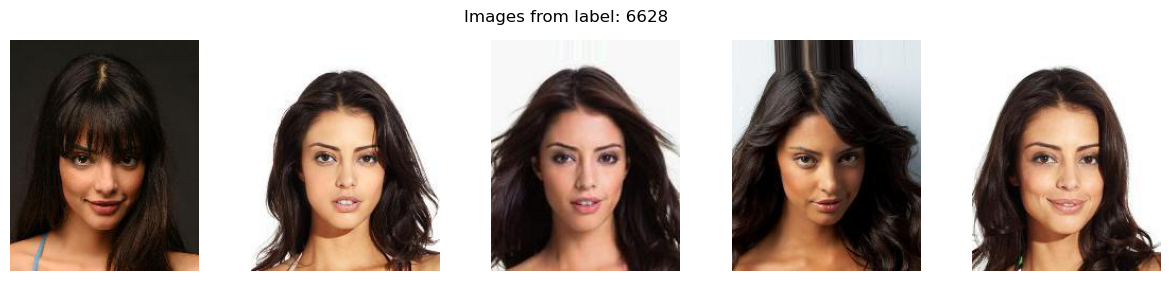

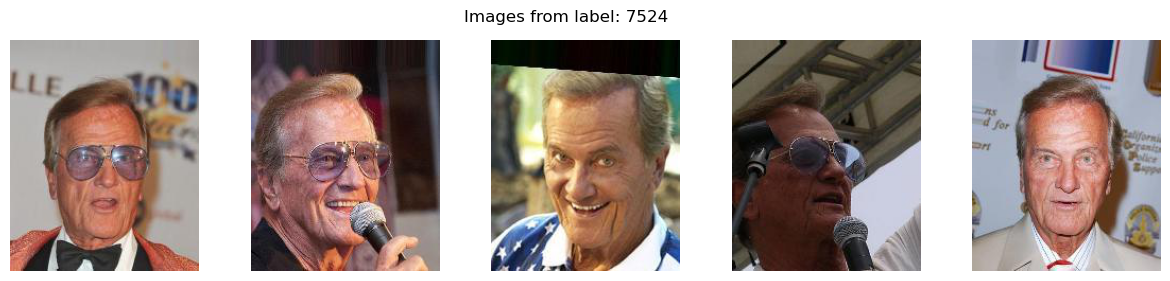

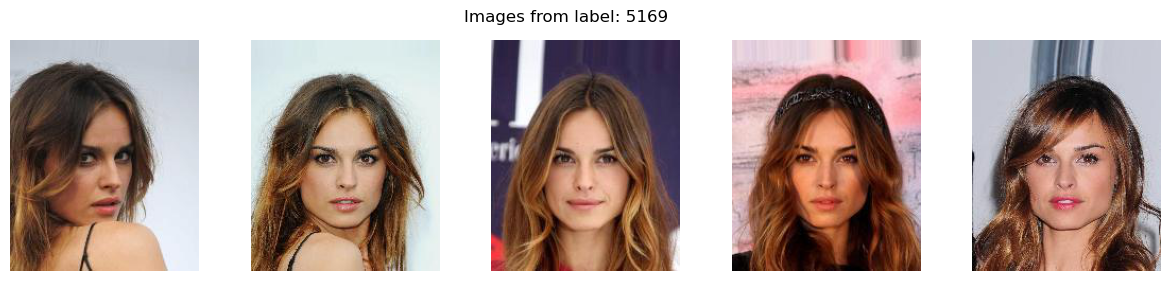

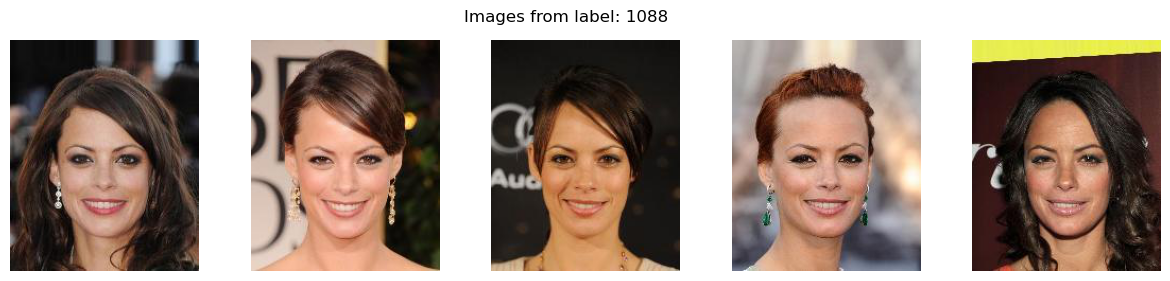

In [28]:
# Explore some of the images from the same label
base_path = "./img_align_celeba/"
for i in range(5):
    label = rng.choice(df["label"].unique())
    df_temp = df[df["label"] == label]
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    for j, (_, row) in enumerate(df_temp.sample(5).iterrows()):
        img = Image.open(base_path + row["image_path"])
        ax[j].imshow(img)
        ax[j].axis('off')
    plt.suptitle(f"Images from label: {label}")
    plt.show()